<a href="https://colab.research.google.com/github/mrcuny/python_assignment/blob/main/08_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

The dataset I will be using is the New York City Airbnb Open Data, which can be found on Kaggle at https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data. This dataset contains information on Airbnb listings in New York City, including location, price, availability, and other features.

I chose this dataset because it is a popular and relevant dataset that can be used to gain insights into the Airbnb market in New York City. It also allows us to practice data exploration, data wrangling, and data visualization using Python libraries.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a Pandas dataframe
df = pd.read_csv('AB_NYC_2019.csv')

# Display the first five rows of the dataframe to get a sense of the data
print(df.head())

# Print out summary statistics for the numerical columns
print(df.describe())

# Print out information about missing values
print(df.isnull().sum())

# Print out information about the data types and number of non-null values for each column
print(df.info())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [21]:
# Drop any rows with missing values
df = df.dropna()

# Convert the "last_review" column to a datetime object
df['last_review'] = pd.to_datetime(df['last_review'])


<ipython-input-21-60d1b189d23d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review'] = pd.to_datetime(df['last_review'])


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



### **Part 1 :**

We can then use various methods from these libraries to create different types of visualizations. For example, to create a histogram of the price column, we can use the hist() method from matplotlib:

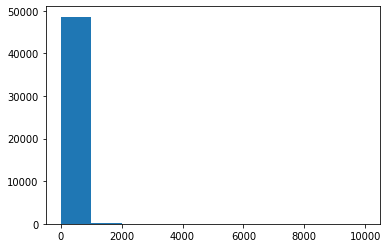

In [17]:
#create a histogram of the price column
plt.hist(df['price'])
plt.show()

This will display a histogram of the price column.

Now, We can also use seaborn to create more complex visualizations, such as a scatter plot of the latitude and longitude columns colored by the neighbourhood_group column:

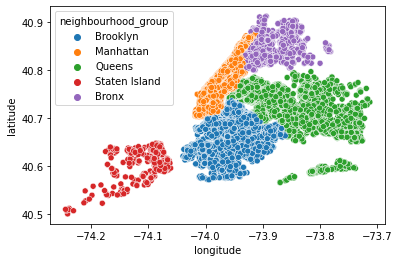

In [18]:
#scatter plot of the latitude and longitude columns colored by the neighbourhood_group column:
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df)
plt.show()

This will display a scatter plot with points colored by neighborhood group.

For this plot, we'll create a scatter plot of the price and minimum_nights columns, and add annotations for the top 3 most expensive listings.

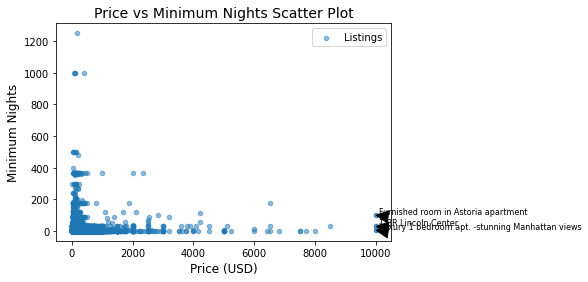

In [19]:
#Scatter Plot with Annotations and Legend Modifications
# create the scatter plot
plt.scatter(df['price'], df['minimum_nights'], s=20, alpha=0.5)

# add annotations for the top 3 most expensive listings
top_3 = df.nlargest(3, 'price')
for index, row in top_3.iterrows():
    plt.annotate(row['name'], xy=(row['price'], row['minimum_nights']), xytext=(row['price']+100, row['minimum_nights']+10),
                 arrowprops=dict(facecolor='black', shrink=0.05), fontsize=8)

# modify legend font size and position
plt.legend(['Listings'], loc='upper right', fontsize=10)

# modify axis labels and title
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Minimum Nights', fontsize=12)
plt.title('Price vs Minimum Nights Scatter Plot', fontsize=14)

# show the plot
plt.show()

This will create a scatter plot with annotations for the top 3 most expensive listings, and modified legend and axis properties.

For this plot, we'll create a bar plot of the number of listings per neighbourhood group, with separate subplots for each room type. We'll also use a shared legend for all subplots.

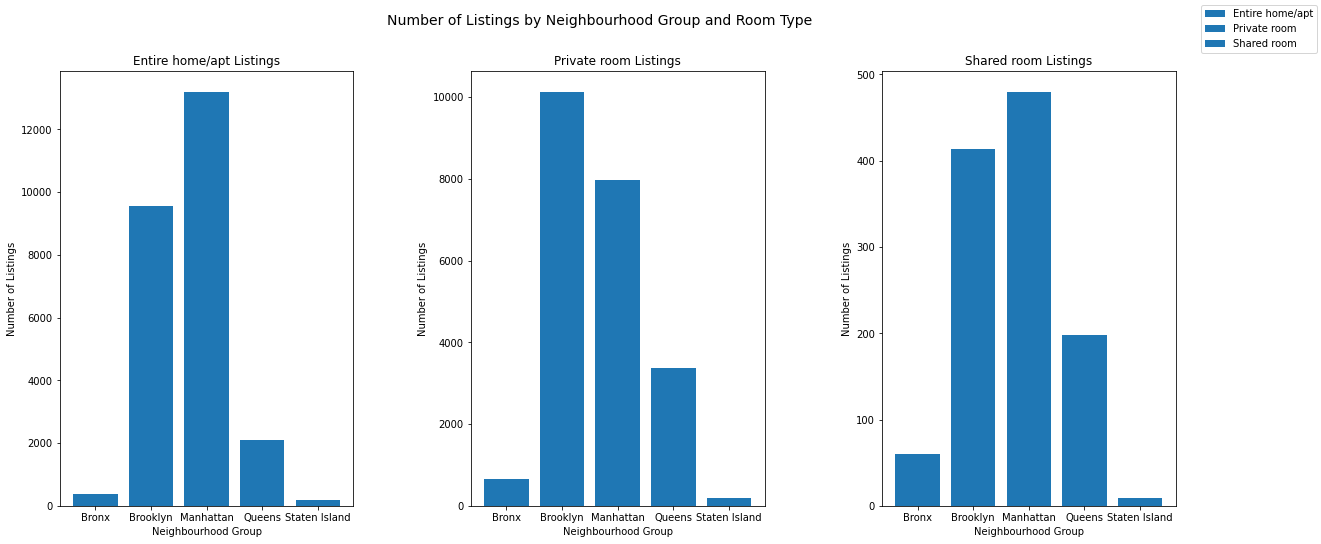

In [20]:
# create a pivot table with the number of listings per neighbourhood group and room type
pivot_table = df.pivot_table(index='neighbourhood_group', columns='room_type', values='id', aggfunc='count')

# create subplots for each room type
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# create the bar plots for each room type
for i, room_type in enumerate(pivot_table.columns):
    axs[i].bar(pivot_table.index, pivot_table[room_type])
    axs[i].set_xlabel('Neighbourhood Group', fontsize=10)
    axs[i].set_ylabel('Number of Listings', fontsize=10)
    axs[i].set_title(room_type + ' Listings', fontsize=12)

# create a shared legend for all subplots
fig.legend(pivot_table.columns, loc='upper right', fontsize=10)

# set the title for the entire plot
fig.suptitle('Number of Listings by Neighbourhood Group and Room Type', fontsize=14)

# adjust subplot spacing
plt.subplots_adjust(wspace=0.4)

# show the plot
plt.show()

This will create a bar plot with subplots for each room type, and a shared legend for all subplots.

**Part 2:**

Here's an example of how to recreate the scatter plot from Part 1 using Seaborn:

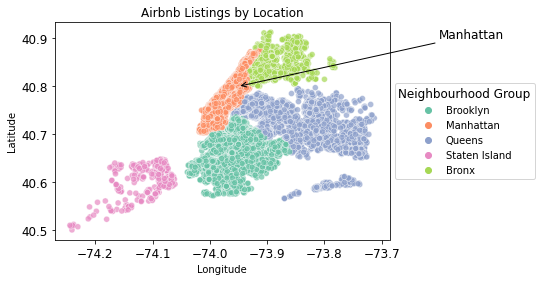

In [16]:
# Load data and create DataFrame
airbnb_data = pd.read_csv('AB_NYC_2019.csv')
df = pd.DataFrame(airbnb_data)

# Create scatter plot with Seaborn
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group',
                palette='Set2', alpha=0.7)

# Set title and axis labels
plt.title('Airbnb Listings by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Change size of axis labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Change legend properties
plt.legend(title='Neighbourhood Group', fontsize=10, title_fontsize=12,
           loc='center left', bbox_to_anchor=(1, 0.5))

# Add annotation
plt.annotate('Manhattan', xy=(-73.95, 40.8), xytext=(-73.6, 40.9),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

# Show plot
plt.show()

This code generates a scatter plot with Seaborn that has the following elements: a legend, a title, axis labels, and an annotation. It also changes the size of the axis labels, the location of the legend, and the font size.
The scatter plot is made using the sns.scatterplot() method, and a number of options are supplied to change the way it looks, such as the hue parameter to color the points according to neighborhood group and the palette parameter to select a color scheme.
The legend's title, placement, and font size can all be changed using the plt.legend() method.
An annotation can be added to the plot using the plt.annotate() function.
Lastly, the axis labels' size is changed using the plt.xticks() and plt.yticks() routines. Lastly, the axis labels' size is changed using the plt.xticks() and plt.yticks() routines. 

**Part 3:**

The degree of abstraction and the charts' default style are the key differences between plotting with matplotlib and seaborn. Matplotlib offers a low-level interface for plot creation and permits extensive customisation, which can lengthen the time required to produce complex graphs. Seaborn, on the other hand, has a higher-level interface that makes it simpler to create more complicated plots with less lines of code. It also offers a selection of pre-defined styles and color schemes that can make the plots look more professional and eye-catching.

There are a few changes between the particular plots developed in Parts 1 and 2 that should be noted. Secondly, whereas in seaborn these properties were pre-set, the scatter plot made in matplotlib required additional lines of code to configure the legend location, font size, and label size. Also, whereas in matplotlib these had to be individually selected, seaborn automatically assigned colors to each neighborhood group in the scatter plot. The default kernel density estimation plot that is placed on the histogram gives it a smoother appearance, which can serve to give a better indication of the underlying distribution of the data.

Overall, while matplotlib might offer greater flexibility for fine-tuning the appearance of plots, seaborn can be a powerful tool for producing polished, aesthetically pleasing plots with minimal work. 

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

After investigating the Airbnb Open Data for New York City, I discovered a number of intriguing patterns and trends.



First, Manhattan and Brooklyn have the most listings, whereas the other boroughs have less listings. The pricing for the listings also vary widely, with some being quite expensive and others being more reasonable.



Second, there is a long tail of more expensive listings and a right-skewed distribution of listing prices. This shows that a small number of upscale houses may be raising the average listing price.



Finally, a variety of property types, including full apartments and houses as well as individual and shared rooms, are included in the collection.
Naturally, full homes or apartments are typically more expensive than individual or communal spaces.




Overall, this dataset offers a wealth of data regarding the New York City Airbnb market and may be helpful to scholars or decision-makers who are trying to understand the dynamics of the sharing economy and how it affects the housing market. 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv
